<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mobile-Customer-Churn" data-toc-modified-id="Mobile-Customer-Churn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mobile Customer Churn</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Outlier-Detection" data-toc-modified-id="Outlier-Detection-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Outlier Detection</a></span></li><li><span><a href="#Sense-Check" data-toc-modified-id="Sense-Check-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Sense Check</a></span></li><li><span><a href="#Missing-Values-Analysis" data-toc-modified-id="Missing-Values-Analysis-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Missing Values Analysis</a></span></li><li><span><a href="#Analysis-of-Categorical-Variables" data-toc-modified-id="Analysis-of-Categorical-Variables-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Analysis of Categorical Variables</a></span></li><li><span><a href="#Transform-Categorical-Values-to-Binary-or-Multi-Class" data-toc-modified-id="Transform-Categorical-Values-to-Binary-or-Multi-Class-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Transform Categorical Values to Binary or Multi-Class</a></span></li><li><span><a href="#Feature-Normalisation" data-toc-modified-id="Feature-Normalisation-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Feature Normalisation</a></span></li></ul></li><li><span><a href="#Baseline-Model:-Logistic-Regression" data-toc-modified-id="Baseline-Model:-Logistic-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Baseline Model: Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Feature Engineering</a></span></li></ul></li><li><span><a href="#K-Nearest-Neighbor-Classification" data-toc-modified-id="K-Nearest-Neighbor-Classification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>K-Nearest Neighbor Classification</a></span></li></ul></div>

# Mobile Customer Churn

In this Portfolio task you will work with some (fake but realistic) data on Mobile Customer Churn.  Churn is where
a customer leaves the mobile provider.   The goal is to build a simple predictive model to predict churn from available features. 

The data was generated (by Hume Winzar at Macquarie) based on a real dataset provided by Optus.  The data is simulated but the column headings are the same. (Note that I'm not sure if all of the real relationships in this data are preserved so you need to be cautious in interpreting the results of your analysis here).  

The data is provided in file `MobileCustomerChurn.csv` and column headings are defined in a file `MobileChurnDataDictionary.csv` (store these in the `files` folder in your project).

Your high level goal in this notebook is to try to build and evaluate a __predictive model for churn__ - predict the value of the CHURN_IND field in the data from some of the other fields.  Note that the three `RECON` fields should not be used as they indicate whether the customer reconnected after having churned. 

__Note:__ you are not being evaluated on the _accuracy_ of the model but on the _process_ that you use to generate it.  You can use a simple model such as Logistic Regression for this task or try one of the more advanced methods covered in recent weeks.  Explore the data, build a model using a selection of features and then do some work on finding out which features provide the most accurate results.  

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline

In [2]:
churn = pd.read_csv("files/MobileCustomerChurn.csv", na_values=["NA", "#VALUE!"], index_col='INDEX')
churn.head()

CUST_ID  ACCOUNT_TENURE  ACCT_CNT_SERVICES   AGE       CFU  \
INDEX                                                               
1            1              46                  1  30.0  CONSUMER   
2            2              60                  3  55.0  CONSUMER   
3            5              65                  1  29.0  CONSUMER   
4            6              31                  1  51.0  CONSUMER   
5            8              95                  1  31.0  CONSUMER   

       SERVICE_TENURE  PLAN_ACCESS_FEE BYO_PLAN_STATUS  PLAN_TENURE  \
INDEX                                                                 
1                  46            54.54         NON BYO           15   
2                  59            54.54         NON BYO            5   
3                  65            40.90             BYO           15   
4                  31            31.81         NON BYO           31   
5                  95            54.54         NON BYO            0   

       MONTHS_OF_CONTRACT_REMAINING  ...  CONTRACT_STATUS  \
INDEX                                ...                    
1                                 0  ...     OFF-CONTRACT   
2                                 0  ...     OFF-CONTRACT   
3                                 0  ...     OFF-CONTRACT   
4                                 0  ...     OFF-CONTRACT   
5                                 0  ...     OFF-CONTRACT   

      PREV_CONTRACT_DURATION  HANDSET_USED_BRAND CHURN_IND  MONTHLY_SPEND  \
INDEX                                                                       
1                         24             SAMSUNG         1          61.40   
2                         24               APPLE         1          54.54   
3                         12               APPLE         1           2.50   
4                         24               APPLE         1           6.48   
5                         24               APPLE         1         100.22   

       COUNTRY_METRO_REGION STATE RECON_SMS_NEXT_MTH  RECON_TELE_NEXT_MTH  \
INDEX                                                                       
1                   COUNTRY    WA                NaN                  NaN   
2                     METRO   NSW                NaN                  NaN   
3                   COUNTRY    WA                NaN                  NaN   
4                   COUNTRY   VIC                NaN                  NaN   
5                     METRO   NSW                NaN                  NaN   

       RECON_EMAIL_NEXT_MTH  
INDEX                        
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
5                       NaN  

[5 rows x 21 columns]

Since the last three columns are not going to be used, they will be removed.

In [3]:
churn = churn.drop(["RECON_SMS_NEXT_MTH", "RECON_TELE_NEXT_MTH", "RECON_EMAIL_NEXT_MTH"], axis=1)
churn

CUST_ID  ACCOUNT_TENURE  ACCT_CNT_SERVICES   AGE       CFU  \
INDEX                                                               
1            1              46                  1  30.0  CONSUMER   
2            2              60                  3  55.0  CONSUMER   
3            5              65                  1  29.0  CONSUMER   
4            6              31                  1  51.0  CONSUMER   
5            8              95                  1  31.0  CONSUMER   
...        ...             ...                ...   ...       ...   
46202    79494              10                  1  61.0  CONSUMER   
46203    79495               2                  1  53.0  CONSUMER   
46204    79496              47                  1  22.0  CONSUMER   
46205    79497              94                  1  40.0  CONSUMER   
46206    79500               0                  1  24.0  CONSUMER   

       SERVICE_TENURE  PLAN_ACCESS_FEE BYO_PLAN_STATUS  PLAN_TENURE  \
INDEX                                                                 
1                  46            54.54         NON BYO           15   
2                  59            54.54         NON BYO            5   
3                  65            40.90             BYO           15   
4                  31            31.81         NON BYO           31   
5                  95            54.54         NON BYO            0   
...               ...              ...             ...          ...   
46202               9            27.27             BYO            7   
46203               2            54.54         NON BYO            2   
46204              47            72.72         NON BYO            7   
46205             182            17.27         NON BYO            4   
46206               0            36.36             BYO            0   

       MONTHS_OF_CONTRACT_REMAINING  LAST_FX_CONTRACT_DURATION  \
INDEX                                                            
1                                 0                         24   
2                                 0                         24   
3                                 0                         12   
4                                 0                         24   
5                                 0                         24   
...                             ...                        ...   
46202                             0                          0   
46203                             0                         24   
46204                            17                         24   
46205                             0                         24   
46206                             0                          0   

      CONTRACT_STATUS  PREV_CONTRACT_DURATION HANDSET_USED_BRAND  CHURN_IND  \
INDEX                                                                         
1        OFF-CONTRACT                      24            SAMSUNG          1   
2        OFF-CONTRACT                      24              APPLE          1   
3        OFF-CONTRACT                      12              APPLE          1   
4        OFF-CONTRACT                      24              APPLE          1   
5        OFF-CONTRACT                      24              APPLE          1   
...               ...                     ...                ...        ...   
46202     NO-CONTRACT                       0              OTHER          0   
46203    OFF-CONTRACT                      24            UNKNOWN          1   
46204     ON-CONTRACT                      24              APPLE          0   
46205    OFF-CONTRACT                      24              APPLE          0   
46206     NO-CONTRACT                       0              APPLE          0   

       MONTHLY_SPEND COUNTRY_METRO_REGION STATE  
INDEX                                            
1              61.40              COUNTRY    WA  
2              54.54                METRO   NSW  
3               2.50              COUNTRY    WA  
4               6.48              COUNTRY   VIC 

In [16]:
# rename some columns to make them more meaningful
churn = churn.rename(columns={'CUST_ID': 'ID',
                              'ACCOUNT_TENURE':'ACC_TENURE',
                              'ACCT_CNT_SERVICES':'NUM_SERVICES',
                              'CFU':'ACC_TYPE',
                              'PLAN_ACCESS_FEE':'PLAN_FEE',
                              'BYO_PLAN_STATUS':'BYO_STATUS',
                              'MONTHS_OF_CONTRACT_REMAINING':'MONTHS_REMAINING',
                              'LAST_FX_CONTRACT_DURATION':'FIX_LAST_DURATION',
                              'HANDSET_USED_BRAND':'BRAND',
                              'COUNTRY_METRO_REGION':'REGION'})
churn

ID  ACC_TENURE  NUM_SERVICES   AGE  ACC_TYPE  SERVICE_TENURE  \
INDEX                                                                    
1          1          46             1  30.0  CONSUMER              46   
2          2          60             3  55.0  CONSUMER              59   
3          5          65             1  29.0  CONSUMER              65   
4          6          31             1  51.0  CONSUMER              31   
5          8          95             1  31.0  CONSUMER              95   
...      ...         ...           ...   ...       ...             ...   
46202  79494          10             1  61.0  CONSUMER               9   
46203  79495           2             1  53.0  CONSUMER               2   
46204  79496          47             1  22.0  CONSUMER              47   
46205  79497          94             1  40.0  CONSUMER             182   
46206  79500           0             1  24.0  CONSUMER               0   

       PLAN_FEE BYO_STATUS  PLAN_TENURE  MONTHS_REMAINING  FIX_LAST_DURATION  \
INDEX                                                                          
1         54.54    NON BYO           15                 0                 24   
2         54.54    NON BYO            5                 0                 24   
3         40.90        BYO           15                 0                 12   
4         31.81    NON BYO           31                 0                 24   
5         54.54    NON BYO            0                 0                 24   
...         ...        ...          ...               ...                ...   
46202     27.27        BYO            7                 0                  0   
46203     54.54    NON BYO            2                 0                 24   
46204     72.72    NON BYO            7                17                 24   
46205     17.27    NON BYO            4                 0                 24   
46206     36.36        BYO            0                 0                  0   

      CONTRACT_STATUS  PREV_CONTRACT_DURATION    BRAND  CHURN_IND  \
INDEX                                                               
1        OFF-CONTRACT                      24  SAMSUNG          1   
2        OFF-CONTRACT                      24    APPLE          1   
3        OFF-CONTRACT                      12    APPLE          1   
4        OFF-CONTRACT                      24    APPLE          1   
5        OFF-CONTRACT                      24    APPLE          1   
...               ...                     ...      ...        ...   
46202     NO-CONTRACT                       0    OTHER          0   
46203    OFF-CONTRACT                      24  UNKNOWN          1   
46204     ON-CONTRACT                      24    APPLE          0   
46205    OFF-CONTRACT                      24    APPLE          0   
46206     NO-CONTRACT                       0    APPLE          0   

       MONTHLY_SPEND   REGION STATE  
INDEX                                
1              61.40  COUNTRY    WA  
2              54.54    METRO   NSW  
3               2.50  COUNTRY    WA  
4               6.48  COUNTRY   VIC  
5             100.22    METRO   NSW  
...              ...      ...   ...  
46202          27.27  COUNTRY   VIC  
46203          54.99    METRO   NSW  
46204          72.72  COUNTRY   NSW  
46205          17.27    METRO   VIC  
46206          36.36    METRO   NSW  

[46206 rows x 18 columns]

In [18]:
# convert feature names to lowercase
churn.columns= churn.columns.str.lower()
churn

id  acc_tenure  num_services   age  acc_type  service_tenure  \
INDEX                                                                    
1          1          46             1  30.0  CONSUMER              46   
2          2          60             3  55.0  CONSUMER              59   
3          5          65             1  29.0  CONSUMER              65   
4          6          31             1  51.0  CONSUMER              31   
5          8          95             1  31.0  CONSUMER              95   
...      ...         ...           ...   ...       ...             ...   
46202  79494          10             1  61.0  CONSUMER               9   
46203  79495           2             1  53.0  CONSUMER               2   
46204  79496          47             1  22.0  CONSUMER              47   
46205  79497          94             1  40.0  CONSUMER             182   
46206  79500           0             1  24.0  CONSUMER               0   

       plan_fee byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                          
1         54.54    NON BYO           15                 0                 24   
2         54.54    NON BYO            5                 0                 24   
3         40.90        BYO           15                 0                 12   
4         31.81    NON BYO           31                 0                 24   
5         54.54    NON BYO            0                 0                 24   
...         ...        ...          ...               ...                ...   
46202     27.27        BYO            7                 0                  0   
46203     54.54    NON BYO            2                 0                 24   
46204     72.72    NON BYO            7                17                 24   
46205     17.27    NON BYO            4                 0                 24   
46206     36.36        BYO            0                 0                  0   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
1        OFF-CONTRACT                      24  SAMSUNG          1   
2        OFF-CONTRACT                      24    APPLE          1   
3        OFF-CONTRACT                      12    APPLE          1   
4        OFF-CONTRACT                      24    APPLE          1   
5        OFF-CONTRACT                      24    APPLE          1   
...               ...                     ...      ...        ...   
46202     NO-CONTRACT                       0    OTHER          0   
46203    OFF-CONTRACT                      24  UNKNOWN          1   
46204     ON-CONTRACT                      24    APPLE          0   
46205    OFF-CONTRACT                      24    APPLE          0   
46206     NO-CONTRACT                       0    APPLE          0   

       monthly_spend   region state  
INDEX                                
1              61.40  COUNTRY    WA  
2              54.54    METRO   NSW  
3               2.50  COUNTRY    WA  
4               6.48  COUNTRY   VIC  
5             100.22    METRO   NSW  
...              ...      ...   ...  
46202          27.27  COUNTRY   VIC  
46203          54.99    METRO   NSW  
46204          72.72  COUNTRY   NSW  
46205          17.27    METRO   VIC  
46206          36.36    METRO   NSW  

[46206 rows x 18 columns]

__Unclear Variable Explanation:__
- NUM_SERVICES: Amount of services within an account
- ACC_TYPE: Private or Corporate
- PLAN_FEE: Monthly fee payable
- BYO_STATUS: Whether the plan is "Bring Your Own" or not
- LAST_DURATION: Duration of last known fixed contract
- PREV_CONTRACT_DURATION: Duration
- CHURN_IND: Churn flagging for disconnected service
- REGION: Metropolitan or Rural area

# Exploratory Data Analysis

## Summary

In [20]:
# get an overview
pandas_profiling.ProfileReport(churn)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
churn.describe()

id    acc_tenure  num_services           age  service_tenure  \
count  46206.000000  46206.000000  46206.000000  46130.000000    46206.000000   
mean   42335.196879     45.874627      1.555707     41.411836       50.318617   
std    22100.432751     33.077927      0.835529     15.263726       51.925537   
min        1.000000      0.000000      1.000000     -4.000000        0.000000   
25%    24951.750000     14.000000      1.000000     28.000000       11.000000   
50%    43261.000000     44.000000      1.000000     40.000000       35.000000   
75%    61132.750000     77.000000      2.000000     52.000000       69.000000   
max    79500.000000    120.000000      4.000000    116.000000      259.000000   

           plan_fee   plan_tenure  months_remaining  fix_last_duration  \
count  46206.000000  46206.000000      46206.000000       46206.000000   
mean      51.364858     10.846708          8.237112          20.349825   
std       20.855419      9.769887          8.341476           8.034631   
min        8.180000      0.000000          0.000000           0.000000   
25%       36.360000      3.000000          0.000000          24.000000   
50%       54.540000      8.000000          7.000000          24.000000   
75%       72.720000     16.000000         16.000000          24.000000   
max      234.540000    147.000000         24.000000          36.000000   

       prev_contract_duration     churn_ind  monthly_spend  
count            46206.000000  46206.000000   46206.000000  
mean                15.249968      0.385015      75.188029  
std                 10.982958      0.486604      73.519041  
min                  0.000000      0.000000       1.020000  
25%                  0.000000      0.000000      36.360000  
50%                 24.000000      0.000000      54.540000  
75%                 24.000000      1.000000      84.530000  
max                 36.000000      1.000000    1965.890000

## Outlier Detection

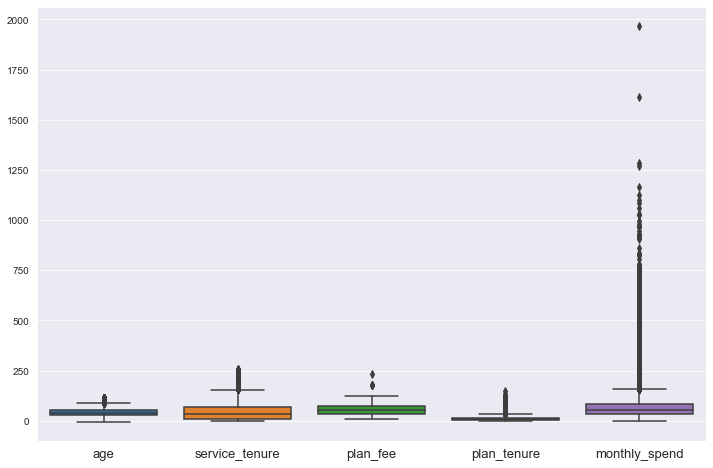

In [34]:
# show boxplot of all columns where outliers seem likely
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))

outlier_columns = churn[["age", "service_tenure", "plan_fee", "plan_tenure", "monthly_spend"]].copy()

sns.boxplot(data=outlier_columns)
plt.xticks(fontsize=13);

Especially monthly spend needs to be analyse. However, due to the different scale of the features, an analysis will be done for each variable separately.

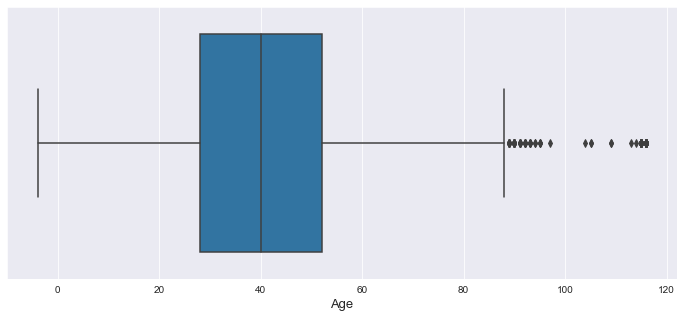

In [38]:
# analyse age with regard to outliers
plt.figure(figsize=(12,5))


sns.boxplot(x="age", data=churn)
plt.xlabel("Age", fontsize=13);

In [42]:
# find cut off value for outlier and sho all records that are outside
q1 = churn["age"].quantile(0.25)
q3 = churn["age"].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + (1.5 * iqr)

churn[churn["age"] > upper_limit]

id  acc_tenure  num_services    age        acc_type  service_tenure  \
INDEX                                                                           
524     1135          20             2   89.0        CONSUMER              20   
745     1609          47             2  116.0  SMALL BUSINESS              11   
1491    3226          42             1   91.0        CONSUMER              42   
2098    4575          40             2   95.0        CONSUMER               5   
3118    6872          76             4  115.0  SMALL BUSINESS              50   
...      ...         ...           ...    ...             ...             ...   
43566  75249          25             2  116.0  SMALL BUSINESS              25   
44292  76370          97             1   91.0        CONSUMER             182   
44607  76875          37             3  116.0  SMALL BUSINESS              14   
44673  76977          79             1   90.0        CONSUMER              63   
44890  77342          92             4  109.0  SMALL BUSINESS             115   

       plan_fee byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                          
524       31.81    NON BYO           20                 4                 24   
745       27.27        BYO           11                 0                 24   
1491      31.81    NON BYO           12                12                 24   
2098      27.27        BYO            5                 0                  0   
3118      54.54    NON BYO            3                 0                 24   
...         ...        ...          ...               ...                ...   
43566     90.90    NON BYO            5                11                 24   
44292      8.18    NON BYO            6                 0                  0   
44607     31.81    NON BYO           14                10                 24   
44673      8.18    NON BYO            7                 0                 12   
44890     40.90        BYO            7                 0                 24   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
524       ON-CONTRACT                      24  SAMSUNG          1   
745      OFF-CONTRACT                      24  UNKNOWN          1   
1491      ON-CONTRACT                      24    OTHER          1   
2098      NO-CONTRACT                       0   GOOGLE          1   
3118     OFF-CONTRACT                      24    APPLE          1   
...               ...                     ...      ...        ...   
43566     ON-CONTRACT                      24  SAMSUNG          1   
44292     NO-CONTRACT                       0  SAMSUNG          0   
44607     ON-CONTRACT                       0    APPLE          0   
44673    OFF-CONTRACT                      12  SAMSUNG          0   
44890    OFF-CONTRACT                      24    APPLE          0   

       monthly_spend   region state  
INDEX                                
524           152.72  COUNTRY   VIC  
745            53.06    METRO    WA  
1491           31.81  COUNTRY   NSW  
2098           27.27  COUNTRY   QLD  
3118           99.99    METRO    SA  
...              ...      ...   ...  
43566         351.02    METRO   QLD  
44292           8.18    METRO   VIC  
44607          31.81    METRO   NSW  
44673          12.72    METRO   VIC  
44890          44.95    METRO   VIC  

[105 rows x 18 columns]

It seems like that records with very old account holders belong to corporate accounts. This is verified in the following. If that is the case, there is no reason to doubt the accuracy of the values.

In [43]:
churn[churn["age"] > 100]

id  acc_tenure  num_services    age        acc_type  service_tenure  \
INDEX                                                                           
745     1609          47             2  116.0  SMALL BUSINESS              11   
3118    6872          76             4  115.0  SMALL BUSINESS              50   
3402    7532          18             1  116.0  SMALL BUSINESS              16   
3805    8450          13             4  116.0  SMALL BUSINESS              13   
3985    8828          99             2  115.0        CONSUMER              45   
5216   11671          16             1  116.0  SMALL BUSINESS              16   
6819   15332          20             2  116.0  SMALL BUSINESS              20   
8064   18076          80             3  115.0  SMALL BUSINESS             131   
10828  23502          84             1  115.0        CONSUMER             197   
13294  27791          53             4  115.0  SMALL BUSINESS              53   
13565  28212         116             1  116.0        CONSUMER              13   
13588  28253          96             2  115.0  SMALL BUSINESS             146   
13893  28739          81             3  115.0  SMALL BUSINESS             169   
15538  31281         114             1  116.0        CONSUMER              37   
16081  32166          97             2  116.0  SMALL BUSINESS               5   
16127  32234          85             1  115.0        CONSUMER             152   
16131  32240           9             2  116.0  SMALL BUSINESS               9   
16984  33598           0             2  116.0  SMALL BUSINESS               0   
17158  33876          95             1  105.0  SMALL BUSINESS              88   
20662  39378          85             1  115.0  SMALL BUSINESS             165   
20923  39801          45             4  115.0  SMALL BUSINESS              45   
21491  40684          93             2  115.0  SMALL BUSINESS             223   
22672  42552          67             2  115.0  SMALL BUSINESS             167   
23698  44190          57             2  115.0  SMALL BUSINESS             177   
24120  44832          53             1  116.0  SMALL BUSINESS              53   
24297  45103          19             1  116.0  SMALL BUSINESS              19   
25067  46304          27             3  116.0  SMALL BUSINESS              19   
25122  46388          42             4  116.0  SMALL BUSINESS              42   
26167  48055           8             4  116.0  SMALL BUSINESS               8   
27778  50536          65             4  115.0  SMALL BUSINESS             203   
28302  51340          65             1  116.0  SMALL BUSINESS              35   
28552  51726          10             1  116.0  SMALL BUSINESS              10   
28989  52422          64             3  115.0  SMALL BUSINESS             193   
29583  53348          47             2  116.0  SMALL BUSINESS              47   
31298  56009          92             3  115.0  SMALL BUSINESS              68   
31494  56325          67             3  115.0  SMALL BUSINESS              95   
31962  57029           1             1  116.0  SMALL BUSINESS               1   
32558  57938          94             4  109.0  SMALL BUSINESS             194   
32623  58027          79             2  115.0  SMALL BUSINESS             169   
33423  59245          28             1  116.0  SMALL BUSINESS              15   
33430  59255          84             2  115.0  SMALL BUSINESS             132   
33703  59692          14             1  115.0        CONSUMER              14   
33752  59772           7             1  113.0        CONSUMER               7   
34296  60592           9             4  116.0  SMALL BUSINESS               9   
34381  60724          92             1  104.0        CONSUMER             175   
34690  61187          86             4  105.0  SMALL BUSINESS              58   
34727  61248          89             2  114.0        CONSUMER              89   
36374  63843          84             4  1

In [63]:
churn.query("age > 100 & acc_type == 'CONSUMER'")

id  acc_tenure  num_services    age  acc_type  service_tenure  \
INDEX                                                                     
3985    8828          99             2  115.0  CONSUMER              45   
10828  23502          84             1  115.0  CONSUMER             197   
13565  28212         116             1  116.0  CONSUMER              13   
15538  31281         114             1  116.0  CONSUMER              37   
16127  32234          85             1  115.0  CONSUMER             152   
33703  59692          14             1  115.0  CONSUMER              14   
33752  59772           7             1  113.0  CONSUMER               7   
34381  60724          92             1  104.0  CONSUMER             175   
34727  61248          89             2  114.0  CONSUMER              89   

       plan_fee byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                          
3985      54.54    NON BYO           14                10                 24   
10828     72.72    NON BYO           16                 8                 24   
13565     40.90        BYO           13                 0                  0   
15538     17.27    NON BYO            5                 0                 24   
16127     36.36        BYO            2                 0                 24   
33703     72.72    NON BYO           14                10                 24   
33752     72.72    NON BYO            7                17                 24   
34381     27.27        BYO            7                 0                 12   
34727     27.27        BYO            7                 0                 12   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
3985      ON-CONTRACT                      24   GOOGLE          1   
10828     ON-CONTRACT                      24    APPLE          1   
13565     NO-CONTRACT                       0    APPLE          0   
15538    OFF-CONTRACT                      24    APPLE          0   
16127    OFF-CONTRACT                      24    APPLE          0   
33703     ON-CONTRACT                       0    APPLE          0   
33752     ON-CONTRACT                       0  SAMSUNG          1   
34381    OFF-CONTRACT                      12  SAMSUNG          0   
34727    OFF-CONTRACT                      12    APPLE          0   

       monthly_spend   region state  
INDEX                                
3985          299.05    METRO    WA  
10828         324.41    METRO    SA  
13565          40.90  COUNTRY    WA  
15538          26.36    METRO    WA  
16127          36.36    METRO   VIC  
33703         110.24    METRO   NSW  
33752         214.73    METRO    SA  
34381          27.27  COUNTRY   VIC  
34727          27.27    METRO   NSW

There are only a few private customers that exceed the age of 100. Since this is seems reasonable, the values are not tweaked nor removed.

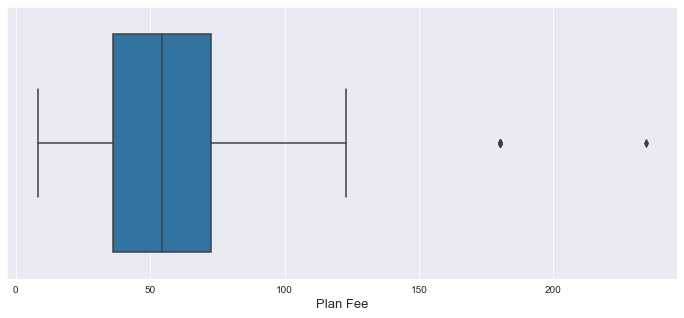

In [67]:
# analyse plan fee with regard to outliers
plt.figure(figsize=(12,5))


sns.boxplot(x="plan_fee", data=churn)
plt.xlabel("Plan Fee", fontsize=13);

In [68]:
# check values that are larger than the upper limit
churn.query("plan_fee > 150")

id  acc_tenure  num_services   age        acc_type  service_tenure  \
INDEX                                                                          
1113    2404          92             3  52.0  SMALL BUSINESS             230   
3868    8581          56             1  31.0  SMALL BUSINESS              56   
13123  27532          59             1  77.0  SMALL BUSINESS              59   
20953  39854          57             1  31.0  SMALL BUSINESS              57   
24474  45359          83             2  33.0  SMALL BUSINESS              83   
38047  66386          84             1  53.0  SMALL BUSINESS              60   

       plan_fee byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                          
1113     180.00    NON BYO           60                 0                 24   
3868     180.00    NON BYO           56                 0                 24   
13123    180.00    NON BYO           59                 0                 24   
20953    234.54    NON BYO           57                 4                 24   
24474    180.00    NON BYO           56                 0                 24   
38047    180.00    NON BYO           60                 0                 24   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
1113     OFF-CONTRACT                      24  SAMSUNG          1   
3868     OFF-CONTRACT                      24  SAMSUNG          1   
13123    OFF-CONTRACT                      24    APPLE          1   
20953     ON-CONTRACT                      24  SAMSUNG          0   
24474    OFF-CONTRACT                      24    APPLE          0   
38047    OFF-CONTRACT                      24    APPLE          0   

       monthly_spend   region state  
INDEX                                
1113          102.72  COUNTRY   VIC  
3868          303.64    METRO    SA  
13123         102.72    METRO   NSW  
20953         117.27    METRO   VIC  
24474         102.72    METRO   VIC  
38047          90.00  COUNTRY   NSW

All outliers are corporate accounts. Since it is likely that companies pay higher fees as there might be multiple plans under one account or there might be high requirements regarding data usage, these values are not changed considering they only represent a fraction of the data. 

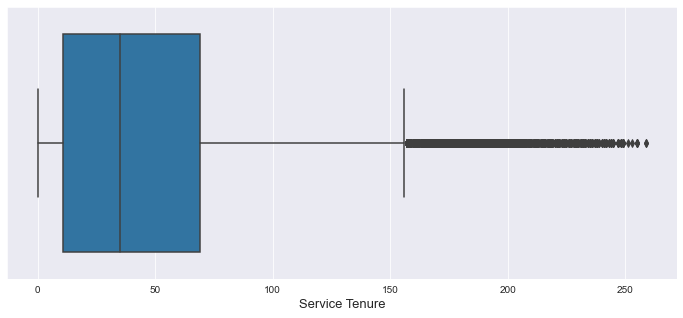

In [69]:
# analyse service tenure with regard to outliers
plt.figure(figsize=(12,5))


sns.boxplot(x="service_tenure", data=churn)
plt.xlabel("Service Tenure", fontsize=13);

In [78]:
# check values that are larger than the upper limit
def upper_limit(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    return upper_limit

service_tenure_limit = upper_limit(churn["service_tenure"])

churn[churn["service_tenure"] > service_tenure_limit]

id  acc_tenure  num_services   age        acc_type  service_tenure  \
INDEX                                                                          
38        76          96             1  61.0        CONSUMER             234   
51       106          94             1  33.0        CONSUMER             185   
58       122          95             2  50.0        CONSUMER             232   
72       150          69             1  60.0        CONSUMER             191   
105      224          93             1  58.0        CONSUMER             163   
...      ...         ...           ...   ...             ...             ...   
46138  79380          92             3  56.0        CONSUMER             175   
46165  79426          94             1  44.0  SMALL BUSINESS             211   
46178  79448          92             1  43.0  SMALL BUSINESS             216   
46198  79486          93             1  88.0        CONSUMER             160   
46205  79497          94             1  40.0        CONSUMER             182   

       plan_fee byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                          
38        27.27        BYO            0                 0                 24   
51        54.54    NON BYO           30                 0                 24   
58        36.36        BYO            1                 0                 12   
72        31.81    NON BYO           17                 7                 24   
105        8.18    NON BYO            6                 0                  0   
...         ...        ...          ...               ...                ...   
46138     45.44    NON BYO           28                 0                 24   
46165     54.54    NON BYO           13                 0                 24   
46178     40.90        BYO           16                 0                 24   
46198     17.27    NON BYO            3                 0                  0   
46205     17.27    NON BYO            4                 0                 24   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
38       OFF-CONTRACT                      24   GOOGLE          1   
51       OFF-CONTRACT                      24    APPLE          1   
58       OFF-CONTRACT                      12    APPLE          1   
72        ON-CONTRACT                      24   GOOGLE          1   
105       NO-CONTRACT                       0  SAMSUNG          1   
...               ...                     ...      ...        ...   
46138    OFF-CONTRACT                      24    APPLE          0   
46165    OFF-CONTRACT                      24    APPLE          1   
46178    OFF-CONTRACT                      24    APPLE          0   
46198     NO-CONTRACT                       0   GOOGLE          0   
46205    OFF-CONTRACT                      24    APPLE          0   

       monthly_spend   region state  
INDEX                                
38             27.27    METRO   VIC  
51             54.54    METRO   NSW  
58             10.07  COUNTRY   QLD  
72             31.81  COUNTRY   NSW  
105             8.18  COUNTRY   NSW  
...              ...      ...   ...  
46138          45.44    METRO   VIC  
46165          76.35  COUNTRY   VIC  
46178          81.35    METRO    WA  
46198          17.27  COUNTRY   NSW  
46205          17.27    METRO   VIC  

[3274 rows x 18 columns]

Since logistic regression is sensitive to outliers and there are a lot for service tenure, these outliers will be replaced. In the following, skewness will be checked and depending on the skewness, median or mean will be used.

__alternatively capping at the upper limit can be considered__

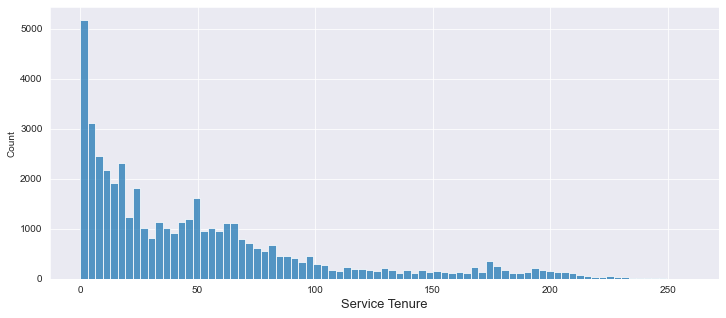

In [81]:
# check skewness
plt.figure(figsize=(12,5))


sns.histplot(x="service_tenure", data=churn)
plt.xlabel("Service Tenure", fontsize=13);

In [ ]:
# create a copy of df and replace values
churn_master = churn.copy()

churn_master["service_tenure"] = churn[churn["service_tenure"] > service_tenure_limit].median

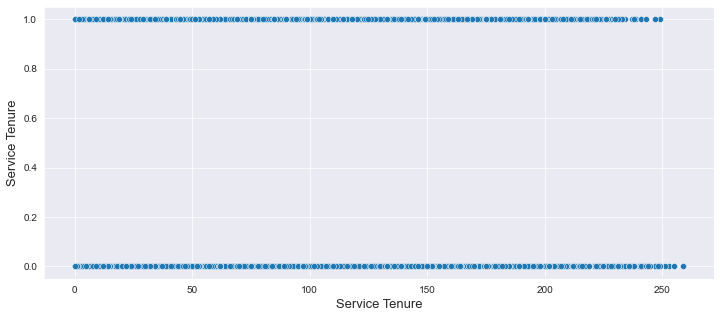

In [82]:
# check linear relationship with target variable
plt.figure(figsize=(12,5))


sns.scatterplot(x="service_tenure", y="churn_ind", data=churn)
plt.xlabel("Service Tenure", fontsize=13)
plt.ylabel("Service Tenure", fontsize=13);

Since the data is highly skewed to the right, a logarithmic transfo

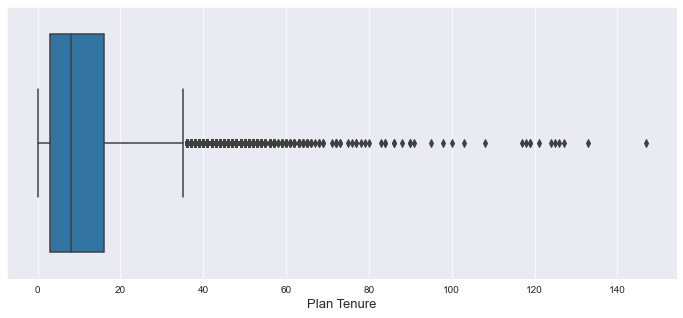

In [79]:
# analyse plan tenure with regard to outliers
plt.figure(figsize=(12,5))


sns.boxplot(x="plan_tenure", data=churn)
plt.xlabel("Plan Tenure", fontsize=13);

In [80]:
# check values that are larger than the upper limit
def upper_limit(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    return upper_limit

plan_tenure_limit = upper_limit(churn["plan_tenure"])

churn[churn["plan_tenure"] > plan_tenure_limit]

id  acc_tenure  num_services   age        acc_type  service_tenure  \
INDEX                                                                          
7         10          90             1  35.0        CONSUMER              90   
24        43          62             1  34.0        CONSUMER              62   
40        78          78             1  27.0  SMALL BUSINESS              78   
46        90          83             2  26.0        CONSUMER              64   
95       199          47             1  22.0        CONSUMER              47   
...      ...         ...           ...   ...             ...             ...   
45994  79173          90             2  50.0  SMALL BUSINESS              90   
46017  79201          75             2  41.0  SMALL BUSINESS              75   
46106  79339          62             2  28.0        CONSUMER              62   
46124  79362          93             1  54.0  SMALL BUSINESS             200   
46135  79376          40             1  22.0        CONSUMER              40   

       plan_fee byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                          
7         71.81    NON BYO           63                 0                 24   
24        80.90    NON BYO           46                 0                 24   
40        53.63    NON BYO           54                 0                 24   
46        44.54        BYO           53                 0                 12   
95        90.00    NON BYO           47                 0                 24   
...         ...        ...          ...               ...                ...   
45994     45.45    NON BYO           40                 4                 24   
46017     53.63    NON BYO           51                 0                 24   
46106     54.54    NON BYO           39                 0                 24   
46124     53.63    NON BYO           57                 0                 24   
46135     30.90        BYO           40                 0                 12   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
7        OFF-CONTRACT                      24    APPLE          1   
24       OFF-CONTRACT                      24    APPLE          1   
40       OFF-CONTRACT                      24    APPLE          1   
46       OFF-CONTRACT                      12    APPLE          1   
95       OFF-CONTRACT                      24   HUAWEI          1   
...               ...                     ...      ...        ...   
45994     ON-CONTRACT                      24  SAMSUNG          0   
46017    OFF-CONTRACT                      24  SAMSUNG          1   
46106    OFF-CONTRACT                      24    APPLE          0   
46124    OFF-CONTRACT                      24  SAMSUNG          1   
46135    OFF-CONTRACT                      12    APPLE          0   

       monthly_spend   region state  
INDEX                                
7              71.81    METRO   NSW  
24            102.07    METRO   VIC  
40              3.42    METRO   NSW  
46             59.98    METRO   NSW  
95             90.00  COUNTRY    WA  
...              ...      ...   ...  
45994          45.95    METRO   NSW  
46017          53.63    METRO   NSW  
46106         134.61  COUNTRY   NSW  
46124         210.50    METRO   VIC  
46135          30.90    METRO   QLD  

[1112 rows x 18 columns]

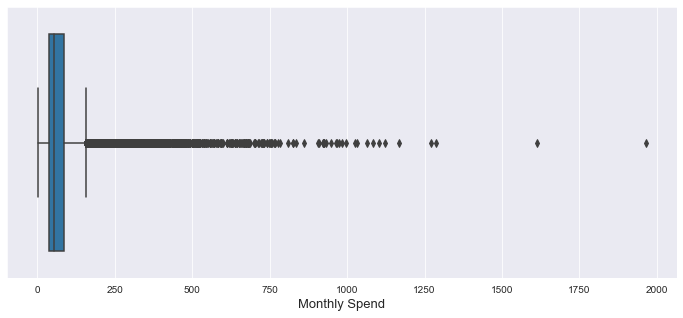

In [83]:
# analyse monthly spend with regard to outliers
plt.figure(figsize=(12,5))


sns.boxplot(x="monthly_spend", data=churn)
plt.xlabel("Monthly Spend", fontsize=13);

In [84]:
# check values that are larger than the upper limit

monthly_spend_limit = upper_limit(churn["monthly_spend"])

churn[churn["monthly_spend"] > monthly_spend_limit]

id  acc_tenure  num_services   age  acc_type  service_tenure  \
INDEX                                                                    
6          9          62             2  25.0  CONSUMER              62   
11        17           9             2  21.0  CONSUMER               9   
21        36          34             1  49.0  CONSUMER              34   
25        44           4             1  68.0  CONSUMER               3   
28        54          92             1  30.0  CONSUMER             106   
...      ...         ...           ...   ...       ...             ...   
46158  79416           3             2  55.0  CONSUMER               3   
46166  79429           5             3  68.0  CONSUMER               4   
46170  79435           3             1  35.0  CONSUMER               3   
46176  79445          75             1  41.0  CONSUMER              75   
46183  79456           9             1  36.0  CONSUMER               9   

       plan_fee byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                          
6         90.90    NON BYO            8                13                 24   
11        72.72    NON BYO            9                15                 24   
21        54.54    NON BYO           13                11                 24   
25        36.36    NON BYO            3                21                 24   
28        72.72    NON BYO           12                12                 24   
...         ...        ...          ...               ...                ...   
46158     54.54    NON BYO            3                21                 24   
46166     54.54    NON BYO            4                20                 24   
46170     36.36    NON BYO            3                21                 24   
46176     54.54    NON BYO           21                 3                 24   
46183     90.90    NON BYO            9                15                 24   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
6         ON-CONTRACT                      24    APPLE          1   
11        ON-CONTRACT                       0    APPLE          1   
21        ON-CONTRACT                      24  SAMSUNG          1   
25        ON-CONTRACT                      24  UNKNOWN          1   
28        ON-CONTRACT                      24    APPLE          1   
...               ...                     ...      ...        ...   
46158     ON-CONTRACT                       0  UNKNOWN          1   
46166     ON-CONTRACT                       0    APPLE          1   
46170     ON-CONTRACT                       0  UNKNOWN          1   
46176     ON-CONTRACT                      24  SAMSUNG          1   
46183     ON-CONTRACT                       0    APPLE          1   

       monthly_spend   region state  
INDEX                                
6             250.46  COUNTRY   VIC  
11            194.29  COUNTRY   NSW  
21            302.41    METRO   VIC  
25            206.41    METRO   VIC  
28            481.33    METRO   NSW  
...              ...      ...   ...  
46158         354.91    METRO   NSW  
46166         279.89  COUNTRY   VIC  
46170         207.58    METRO   VIC  
46176         244.91  COUNTRY   QLD  
46183         270.74  COUNTRY    WA  

[3666 rows x 18 columns]

consider calculating monthly spend by num services?

In [87]:
# check extremely high values
churn[churn["monthly_spend"] > 1000]

id  acc_tenure  num_services   age        acc_type  service_tenure  \
INDEX                                                                          
3362    7449           3             2  21.0  SMALL BUSINESS               3   
5953   13379          27             1  42.0        CONSUMER              27   
7407   16625          74             1  28.0        CONSUMER              74   
7947   17800          93             2  63.0  SMALL BUSINESS             214   
8349   18664           2             1  21.0        CONSUMER               2   
10690  23201           3             1  32.0        CONSUMER               3   
13686  28411          71             3   NaN  SMALL BUSINESS               9   
37568  65630           1             1  26.0        CONSUMER               1   
37906  66177          65             1  28.0        CONSUMER              45   
42752  73898           1             1  41.0        CONSUMER               1   
46073  79291           2             1  22.0        CONSUMER               2   

       plan_fee byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                          
3362     122.72    NON BYO            3                21                 24   
5953     122.72    NON BYO            2                22                 24   
7407     122.72    NON BYO            1                21                 24   
7947      72.72    NON BYO           14                10                 24   
8349      54.54    NON BYO            2                22                 24   
10690     54.54        BYO            0                 0                  0   
13686     72.72    NON BYO            3                21                 24   
37568    122.72    NON BYO            1                23                 24   
37906     45.45    NON BYO           11                13                 24   
42752     36.36    NON BYO            1                23                 24   
46073     45.45        BYO            1                 0                  0   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
3362      ON-CONTRACT                       0  SAMSUNG          1   
5953      ON-CONTRACT                      24    APPLE          1   
7407      ON-CONTRACT                      24  SAMSUNG          1   
7947      ON-CONTRACT                      12    APPLE          1   
8349      ON-CONTRACT                       0    APPLE          1   
10690     NO-CONTRACT                       0  SAMSUNG          1   
13686     ON-CONTRACT                      24    APPLE          0   
37568     ON-CONTRACT                       0    APPLE          0   
37906     ON-CONTRACT                      24    APPLE          0   
42752     ON-CONTRACT                       0  SAMSUNG          0   
46073     NO-CONTRACT                       0    APPLE          0   

       monthly_spend   region state  
INDEX                                
3362         1286.57  COUNTRY   QLD  
5953         1027.03    METRO   NSW  
7407         1166.90  COUNTRY   QLD  
7947         1062.63    METRO    WA  
8349         1123.05    METRO   VIC  
10690        1271.93    METRO   NSW  
13686        1084.53    METRO   VIC  
37568        1101.44  COUNTRY    WA  
37906        1031.19    METRO   VIC  
42752        1613.61  COUNTRY   NSW  
46073        1965.89    METRO   NSW

After some research, it is clear that:
- regular mobile plans do not cost more than AUD120
- family plans are around AUD150

## Sense Check

In [ ]:
# account tenure > service tenure > plan tenure?

In [ ]:
# are there records where months_remaining is zero but status is on-contract?

## Missing Values Analysis

In [ ]:
# analyse missing values

## Analysis of Categorical Variables

## Transform Categorical Values to Binary or Multi-Class

## Feature Normalisation

In [ ]:
# normalise features

# Baseline Model: Logistic Regression
assumptions:
- absence of multicollinearity
- no outliers
- independent variables are linearly related to log odds

## Feature Engineering

# K-Nearest Neighbor Classification